## Demos of applying Lagrangean relaxation based optimization algorithm to solve Set Covering Problems

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from lrscp import *  # the implementation of Lagrangean relaxation based algorithm
from scp_eval import * # find the true optimal solution using Gurobi solver for evaluation

## 1. Simulated case

The first case uses a simulated clustered data. The simulated "clustered" data points are generated within given circles determined by given centers and radii. The goal is to find the minimum number of points so that all points are covered given coverage standard. 

In [2]:
circles = {(1,1):1, (2,2): 1} # two circles, e.g. the first one: the center is on (1,1) and radius is 1

In [3]:
# generate clusters of points by given centers and radius
points_x, points_y, points_cluster, points_c = generate_points(circles, 10)

Here, the 0th and 11th points are centers of given circles. 

In [4]:
(points_x[0], points_y[0]), (points_x[11], points_y[11])

((1.0, 1.0), (2.0, 2.0))

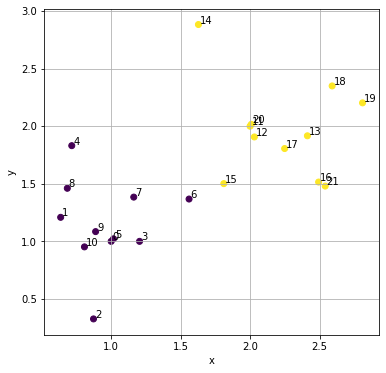

In [5]:
# plots of data 
plt.figure(figsize=(6,6))
plt.scatter(points_x, points_y, c = points_cluster)
for i in range(len(points_x)):
    plt.text(points_x[i] + 0.01, points_y[i] + 0.01, str(i))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show(block=True)

Now we can use the Lagrangean relaxation based algorithm to solve this Set Cover Problem. 

In [6]:
# compute coverage information with given points and coverage standard
S = 1 
a, N = compute_a_N(points_x, points_y, S)

In [7]:
# set hyperparameters
alpha = 2
beta = 0.95
epsilon = 0.01
maxItr = 100

In [8]:
# run the Lagrangean algprithm
LB, sol_LRSCP, best_UB, sol_best_UB, caches = Lagrangean(len(points_x), len(points_y),
                                                          points_c, a, N, N, 
                                                         S, alpha, beta, epsilon, maxItr)

In [9]:
# lower bouds, solution of Lagrangean relaxed SCP of last iteration
# best upper bound found, solution correpond to best_UB
LB, sol_LRSCP, best_UB, sol_best_UB

(1.990505030975696, [0, 1, 3, 5, 9, 10, 11, 20], 2.0, [11, 0])

The found best solution is to select columns 0 and 11, which are exactly the given centers. The convergence process of this algorithm can be visualized as belows.

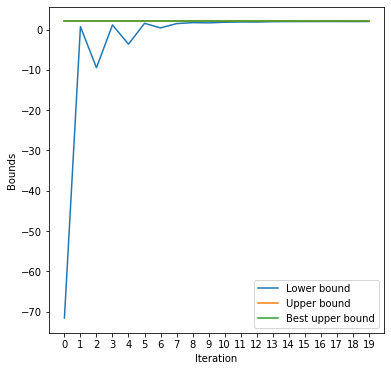

In [10]:
# plot the convergence process of Lagrangean iterations
plt.figure(figsize = (6,6))
plt.plot(caches["Itr"], caches["LB"])
plt.plot(caches["Itr"], caches["UB"])
plt.plot(caches["Itr"], caches["Best_UB"])
plt.legend(['Lower bound', 'Upper bound', 'Best upper bound'], loc = 'lower right')
plt.xlabel('Iteration')
plt.ylabel('Bounds') 
plt.xticks(np.arange(0, 20, step = 1)) 
plt.show(block = True)

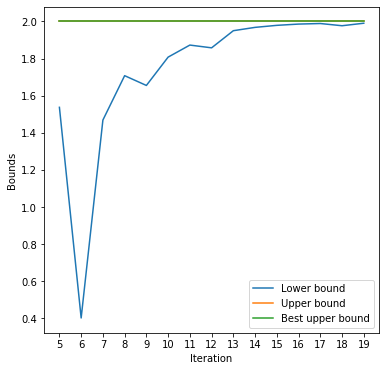

In [11]:
# zoom in 
zoom_start = 5
plt.figure(figsize = (6,6))
plt.plot(caches["Itr"][zoom_start: ], caches["LB"][zoom_start: ])
plt.plot(caches["Itr"][zoom_start: ], caches["UB"][zoom_start: ])
plt.plot(caches["Itr"][zoom_start: ], caches["Best_UB"][zoom_start: ])
plt.legend(['Lower bound', 'Upper bound', 'Best upper bound'], loc = 'lower right')
plt.xlabel('Iteration')
plt.ylabel('Bounds')
plt.xticks(np.arange(zoom_start, 20, step = 1)) 
plt.show(block = True)

### How $\beta$ affect the performance of the algorithm?

In [12]:
betaList = np.arange(0.8, 1.01, step = 0.02) # a bunch of beta's
betaList

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [13]:
# try the algorithm with different beta's
LBList, best_UBList = [], [] 
for beta in betaList:
    LB, sol_LRSCP, best_UB, sol_best_UB, caches = Lagrangean(len(points_x), len(points_y),
                                                          points_c, a, N, N, 
                                                         S, alpha, beta, epsilon, maxItr)
    LBList.append(LB)
    best_UBList.append(best_UB)

The below plot shows that the final upper bound after 100 iterations across different $\beta$. We hope the upper bound is as close to the best upper bound found as possible.

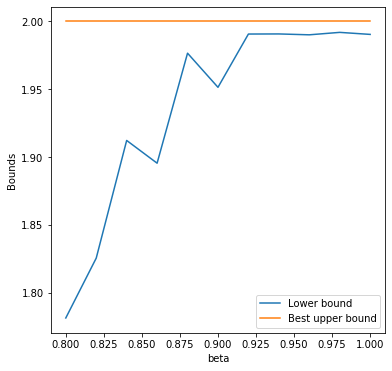

In [14]:
# plots of lower bounds with different beta
plt.figure(figsize = (6,6))
plt.plot(betaList, LBList)
plt.plot(betaList, best_UBList)
plt.legend(['Lower bound', 'Best upper bound'], loc = 'lower right')
plt.xlabel("beta")
plt.ylabel('Bounds') 
# plt.xticks(np.arange(0, 20, step = 1)) 
plt.show(block = True)

So $\beta$ affects the convergence. 

Undershoot: A smaller $\beta$ shrinks $\alpha$ too fast since $\alpha = \beta\times\alpha$, thus $\alpha$ will be reduced to close to 0 very rapidly. Therefore, $\lambda$'s and lower bounds are updated very slowly after several iterations. 

Overshoot: if $\beta$ is too large, $\alpha$ is shrunk slowly. This may lead to $\lambda$ changing too quickly and thus a overshoot. 

Also, other hyperparameters like the inital $\alpha$, maximum iterations allowed $maxItr$, gap tolerance $\epsilon$ all affect the performance of this algorithm.

## 2. Swain case

The second case is to find the minimum number of points so that all points can be covered/served with the given coverage standard. Swain data, a conventional dataset for testing algorithms in location modeling, is used here. This dataset contains the x and y coordinates of 55 locations.

In [15]:
inputFile = "Data/swain.txt" # data file
infile = open(inputFile,"r")
line = infile.readline()
points_x = []
points_y = []
for line in infile:
    line = line.strip().split("\t") # read data
    points_x.append(float(line[1]))
    points_y.append(float(line[2]))
points_x = np.array(points_x)
points_y = np.array(points_y)

In [16]:
# generate costs, the example here are uniform costs
points_c = np.ones(len(points_x))

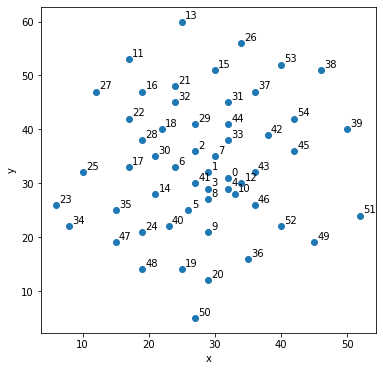

In [17]:
# plots of Swain data
plt.figure(figsize = (6,6))
plt.scatter(points_x, points_y)
for i in range(len(points_x)):
    plt.text(points_x[i] + 0.5, points_y[i] + 0.5, str(i))
plt.xlabel("x")
plt.ylabel("y")
plt.show(block = True)

In [18]:
# compute coverage information with given points and coverage standard
S = 20
a, N = compute_a_N(points_x, points_y, S)

In [19]:
# set hyperparameters
alpha = 2
beta = 1
epsilon = 0.01
maxItr = 100

In [20]:
LB, sol_LRSCP, best_UB, sol_best_UB, caches = Lagrangean(len(points_x), len(points_y),
                                                          points_c, a, N, N, 
                                                         S, alpha, beta, epsilon, maxItr)

In [21]:
# lower bouds, solution of Lagrangean relaxed SCP of last iteration
# best upper bound found, solution correpond to best_UB
LB, sol_LRSCP, best_UB, sol_best_UB

(2.7708300626679336, [15, 22, 31, 37, 45], 3.0, [36, 37, 28])

The best feasible solution found is that at least 3 points needs to be selected in order to cover all points and they are 28th, 36th and 37th points. In order to verify if the true optimal solution is found, the optimization solver Gurobi which usually uses linear programming methods with branch-and-bound techniques for mixed integer programming problem, can be called to solve this problem optimally. 

In [22]:
print("Solving SCP ...")
sol, obj = SCP(len(points_x), len(points_x), points_c, N)
print("The selected columns are ", sol)
print("The optimal objective value is ", obj)

Solving SCP ...
Using license file /Users/jing/gurobi.lic
Academic license - for non-commercial use only
The selected columns are  [6, 31, 36]
The optimal objective value is  3.0


The minimum number of points to select is also 3 so the Lagarangean relaxation based algorithm was able to find the optimal solution in this case. Note that the Gurobi solver finds another set of selected points, which means this problem has multiple optimal solutions.

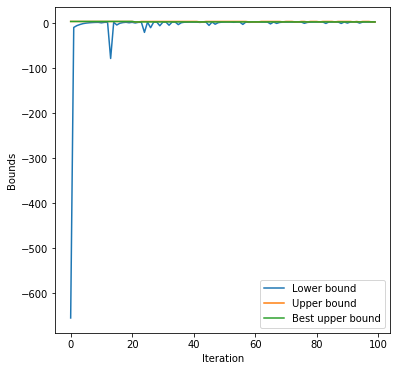

In [23]:
# plot Lagrangean iterations
plt.figure(figsize=(6,6))
plt.plot(caches["Itr"], caches["LB"])
plt.plot(caches["Itr"], caches["UB"])
plt.plot(caches["Itr"], caches["Best_UB"])
plt.legend(['Lower bound', 'Upper bound', 'Best upper bound'], loc = 'lower right')
plt.xlabel('Iteration')
plt.ylabel('Bounds')
plt.show(block = True)

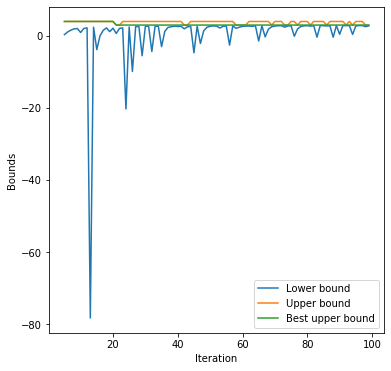

In [24]:
# zoom in 
zoom_start = 5
plt.figure(figsize = (6,6))
plt.plot(caches["Itr"][zoom_start: ], caches["LB"][zoom_start: ])
plt.plot(caches["Itr"][zoom_start: ], caches["UB"][zoom_start: ])
plt.plot(caches["Itr"][zoom_start: ], caches["Best_UB"][zoom_start: ])
plt.legend(['Lower bound', 'Upper bound', 'Best upper bound'], loc = 'lower right')
plt.xlabel('Iteration')
plt.ylabel('Bounds')
plt.show(block = True)

We can get even better results when increasing $maxItr$ to 1000.

In [25]:
maxItr = 1000
LB, sol_LRSCP, best_UB, sol_best_UB, caches = Lagrangean(len(points_x), len(points_y),
                                                          points_c, a, N, N, 
                                                         S, alpha, beta, epsilon, maxItr)

In [26]:
LB, sol_LRSCP, best_UB, sol_best_UB

(2.9900962867900773, [], 3.0, [36, 37, 28])

The lower bound is very close to the upper bound now, so we are much more confident about the best feasible solution we found. $maxItr$ is a hyperparameter, a larger $maxItr$ often gives more converged bounds but also needs more computational efforts.

## 3. SB case 

The third case involves locating the minimum number of facilities to cover all demand in southern Santa Barbara area (shown in the below figure). There are 82 potential facilities and 2070 demand points. The matrix data contains the network distance between each potential facility and demand point, which is generated using real transportation network.  

More details about this data can be found in the paper:
Xu, J., Murray, A., Wang, Z., & Church, R. (2020). Challenges in applying capacitated covering models. Transactions in GIS, 24(2), 268-290. 

<img src="sbc.png">

In [27]:
matrixFile = "matrix_82.txt" # network distance matrix file
S = 10 * 5280
alpha = 8
beta = 0.98
epsilon = 0.01
maxItr = 500

In [28]:
# compute coverage information with given distance matrix and coverage standard
a, N, M = compute_cov(matrixFile, S)

In [29]:
# generate costs, the example here are uniform costs
cost_coef = np.ones(len(M))

In [30]:
# apply the Lagarangean relaxation based algorithm
LB, sol_LRSCP, best_UB, sol_best_UB, caches = Lagrangean(len(M), len(N),
                                                          cost_coef, a, M, N, 
                                                         S, alpha, beta, epsilon, maxItr)

In [31]:
# the lower bound of last iteration
# the best upper bound found so far and associated selected facilities
LB, best_UB, sol_best_UB

(2.901582931660535, 3.0, [24, 11, 62])

The minimum number of facilities for a complete coverage found here is 3 and facilities 11, 24 and 62 should be sited. Also, the result can be evaluated with a Gurobi solver.

In [32]:
print("Solving SCP ...")
sol, obj = SCP(len(M), len(N), cost_coef, N)
print("The selected columns are ", sol)
print("The optimal objective value is ", obj)

Solving SCP ...
The selected columns are  [11, 24, 62]
The optimal objective value is  3.0


The Gurobi solver gives exactly the same result as the algorithm, so the algorithm found the optimal solution :)

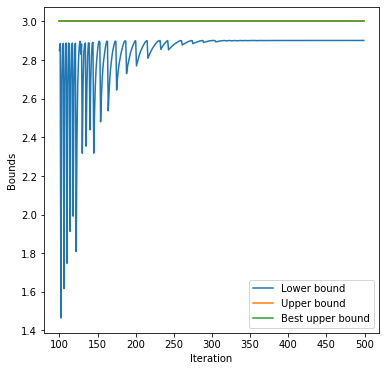

In [35]:
# plot Lagrangean iterations
# start with 100 iteration
zoom_start = 100
plt.figure(figsize = (6,6))
plt.plot(caches["Itr"][zoom_start: ], caches["LB"][zoom_start: ])
plt.plot(caches["Itr"][zoom_start: ], caches["UB"][zoom_start: ])
plt.plot(caches["Itr"][zoom_start: ], caches["Best_UB"][zoom_start: ])
plt.legend(['Lower bound', 'Upper bound', 'Best upper bound'], loc = 'lower right')
plt.xlabel('Iteration')
plt.ylabel('Bounds')
plt.show(block = True)